In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
#read the csv file
df=pd.read_csv('Student_performance_data.csv')

In [5]:
df.shape

(2392, 15)

In [6]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [7]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [11]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [13]:
X = df.drop(columns=['StudentID', 'GradeClass']) # student id has no impact for target column specifically
y = df['GradeClass']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,
                                              test_size=0.2)

In [16]:
X_test.shape,y_test.shape

((479, 13), (479,))

In [17]:
# to have normalized/uniform data point for better  model performance
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [18]:
model = RandomForestClassifier(max_depth=10)


In [19]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [34]:
y_pred_train = model.predict(X_train_scaled)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")


Training Accuracy: 0.9576581285938317


In [28]:
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

 Test Accuracy: 0.9123173277661796
Confusion Matrix:
[[ 10   5   3   2   2]
 [  1  43   0   1   4]
 [  1   2  73   5   4]
 [  0   2   2  77   5]
 [  0   1   0   2 234]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.45      0.59        22
         1.0       0.81      0.88      0.84        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.84       479
weighted avg       0.91      0.91      0.91       479



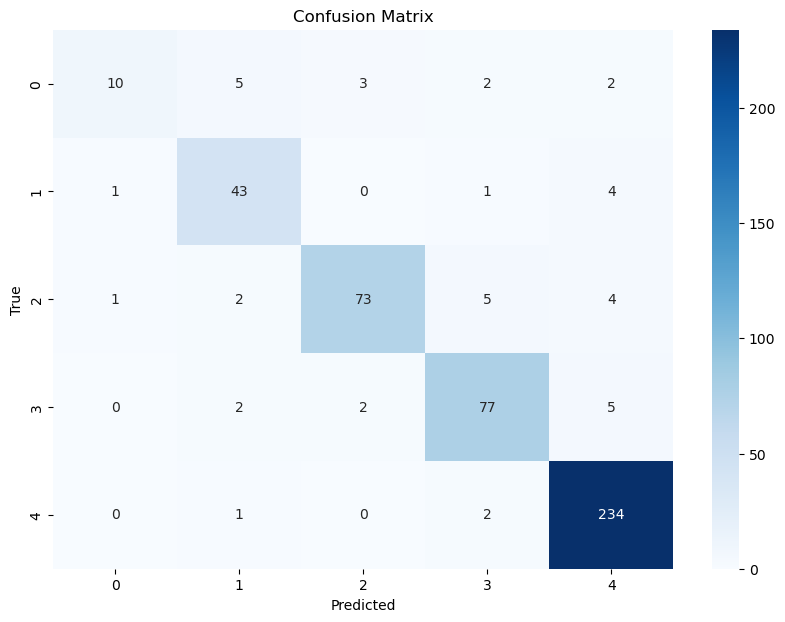

In [35]:
print(f" Test Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

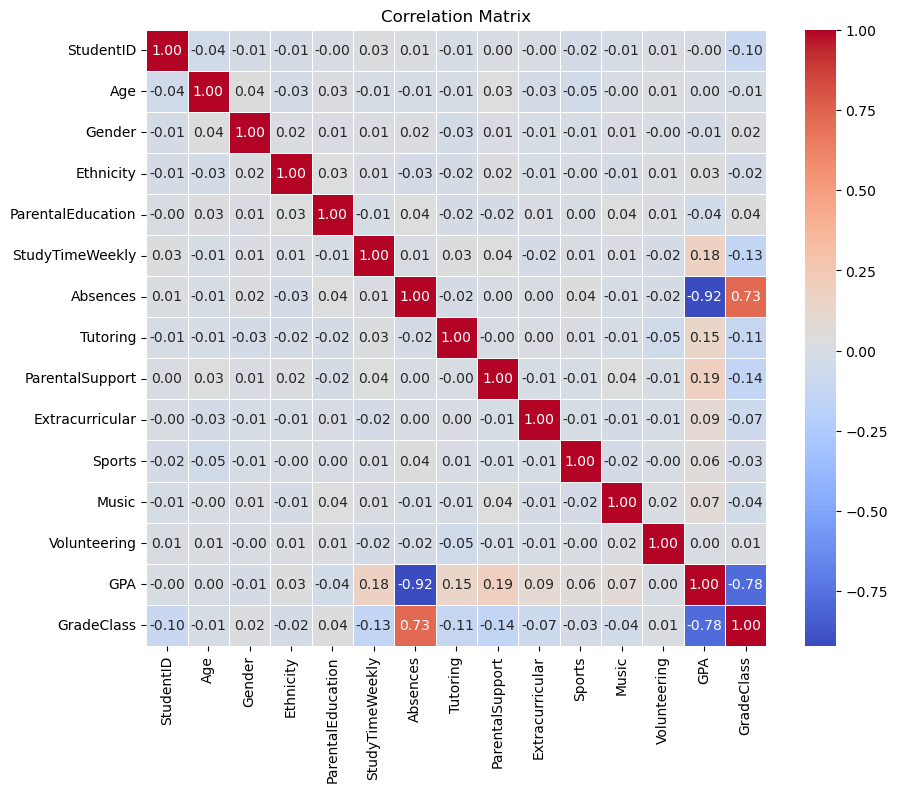

In [37]:
## correlation heatmap
corr_matrix = df.corr(columns=[''])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

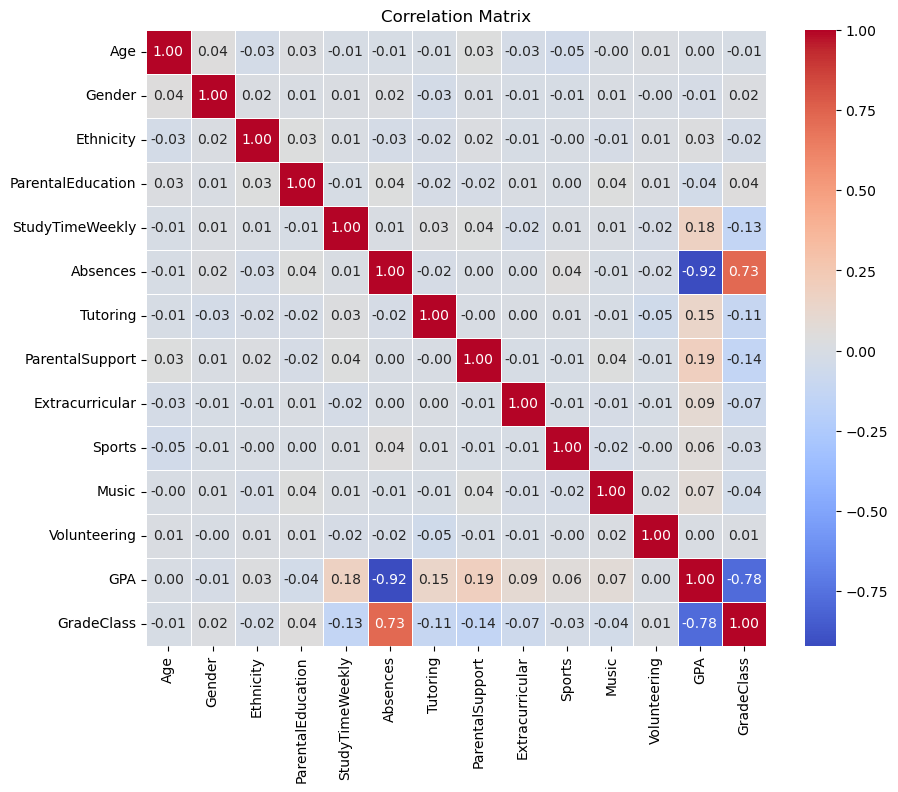

In [38]:
########### this time i will not include student id ,as we discussed it does not have that impact
columns_of_interest = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
                        'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
                        'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
                        'GradeClass']
corr_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

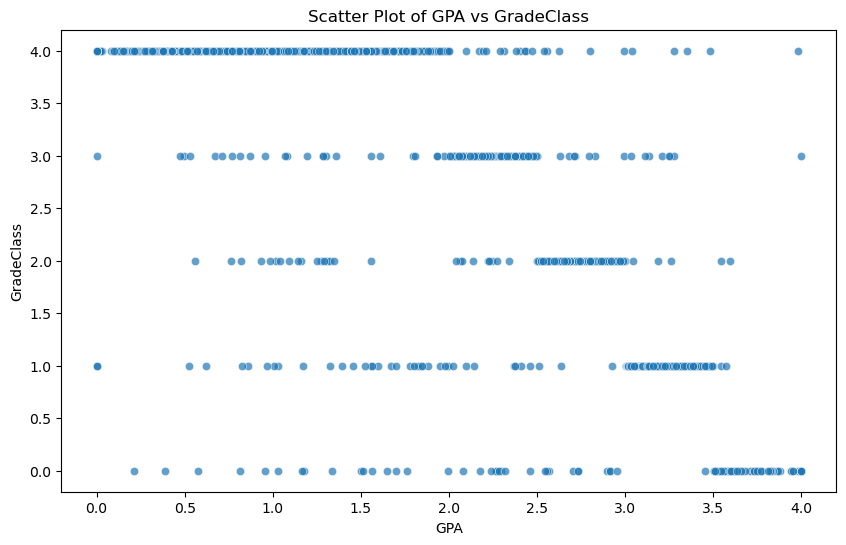

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GPA', y='GradeClass', data=df, alpha=0.7)

# Add labels and title
plt.xlabel('GPA')
plt.ylabel('GradeClass')
plt.title('Scatter Plot of GPA vs GradeClass')

# Show plot
plt.show()